#                                      PROJECT TITLE : TMDB Movie Dataset

#                                      INTRODUCTION

#### The data is about the entertainment (Movie) industry. the data contain about 10,000 movies ranging from different genres as could be seen the data. The following will be look foward to in the analysis of this data in other to hhave a better overview.
     1. Dropping of empty columns or values
     2. Highest Movie Released by Month
     3. Highest Movie Released Per Year
     4  Top 5 Movies Production Company
     5. Comparing the 90s movies based on budget and profit with the 20s 
     6. Movie with the highest profit

In [1]:
#Importing Important Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly
import plotly.express as px
import plotly.io as pio
import seaborn as sns
sns.set()

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected= True)

from PIL import Image
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')


#                                        DATA WRANGLING 

In order to have an effective analysis and better understanding of the dataset, wrangling is important in the analysis of the data. The following steps were taken.
1. Dropping of some irrelevance columns such as [imdb_id','homepage','tagline','overview','keywords','cast] which are not needed.
2. Making id as index
3. Extracting months from the release_date column: This was necessary in the analysis so I can have more insight regarding when some movies are released and how many movies are being relseasd in a specific months)
4. Checking and dropping null values: Null values arent needed in the dataset for analysis because having them wont give us a better undertsanding of our data.
5. Dropping duplicate : This was neccesary becasue duplicate are more like noises in our dataset, therefore, dropping makes our work more efficient.
6. Creating a Profit Column:  A new column profit was created so I can document the profit genrated from the movies produced 
7. Making a copy of the Original Data framein In[30] and splitting the column of genres using split function and explode: This was done so I can have a single genres representing a columns


In [2]:
#importing data and checking at data structures and missing columns
movie = pd.read_csv(r"C:\Users\muazh\OneDrive\Documents\UDACITY\PROJECT 1\tmdb-movies.csv")
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
#dropping irrelevant columns
movie.drop(['imdb_id','homepage','tagline','overview','keywords','cast'], axis = 1, inplace = True)

In [4]:
#Making id as index 
movie.set_index('id', inplace = True)


In [5]:
#extracting months from the release date column
movie['release_date'] = pd.to_datetime(movie['release_date'])
movie['release_month'] = movie['release_date'].dt.month_name()

In [6]:
#checking for null values
movie[movie['director'].isnull()]


,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
id,,,,,,,,,,,,,,,
320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,NaN,71,Comedy,New Wave Entertainment,2015-01-23,14,6.6,2015,0.000000e+00,0.000000e+00,January
355131,0.108072,0,0,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,Netflix,2015-08-10,12,7.5,2015,0.000000e+00,0.000000e+00,August
321160,0.100910,0,0,With This Ring,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,2015-01-24,14,6.5,2015,0.000000e+00,0.000000e+00,January
259910,0.291253,0,0,Marvel Studios: Assembling a Universe,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,2014-03-18,32,6.3,2014,0.000000e+00,0.000000e+00,March
253675,0.269468,0,0,Unlocking Sherlock,NaN,60,TV Movie|Documentary,NaN,2014-01-19,11,7.2,2014,0.000000e+00,0.000000e+00,January
256561,0.119891,150000,0,Free to Play,NaN,75,Documentary,Valve,2014-03-19,40,7.0,2014,1.381637e+05,0.000000e+00,March
296370,0.135376,0,0,Dance-Off,NaN,0,Romance|Music|Comedy,NaN,2014-01-01,18,5.7,2014,0.000000e+00,0.000000e+00,January
301235,0.038364,0,0,Top Gear: The Perfect Road Trip 2,NaN,94,Documentary,2 Entertain Video,2014-11-17,12,6.8,2014,0.000000e+00,0.000000e+00,November
133365,0.256703,0,0,The Diary of Anne Frank,NaN,100,Drama,Darlow Smithson Productions|British Broadcasti...,2009-01-09,19,7.5,2009,0.000000e+00,0.000000e+00,January


In [7]:
#dropping empty rows in the dataset
movie.dropna(inplace= True)
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 135397 to 22293
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9807 non-null   float64       
 1   budget                9807 non-null   int64         
 2   revenue               9807 non-null   int64         
 3   original_title        9807 non-null   object        
 4   director              9807 non-null   object        
 5   runtime               9807 non-null   int64         
 6   genres                9807 non-null   object        
 7   production_companies  9807 non-null   object        
 8   release_date          9807 non-null   datetime64[ns]
 9   vote_count            9807 non-null   int64         
 10  vote_average          9807 non-null   float64       
 11  release_year          9807 non-null   int64         
 12  budget_adj            9807 non-null   float64       
 13  revenue_adj 

In [8]:
#dropping duplicated
movie[movie.duplicated()].count()
movie.drop_duplicates(inplace = True)

In [9]:
#Creating a Profit Column
#movie['profit'] =  movie['revenue'] - movie['budget']
def diff (b, a):
    return(b-a)

movie['profit'] = movie.apply(lambda x: diff(x['revenue'], x['budget']), axis = 1)


In [10]:
movie.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,profit
id,,,,,,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,June,1363528810
76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,May,228436354
262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,March,185238201
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,December,1868178225
168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,April,1316249360


#                                            EXPLORATORY DATA ANALYSIS

#### visualization of data to generate insights and provide analysis of the dataset 

# How are the parameters distributed?
### The histogram below shows the distrubtions of the each dataset.

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'release_date'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>,
        <AxesSubplot:title={'center':'profit'}>, <AxesSubplot:>]],
      dtype=object)

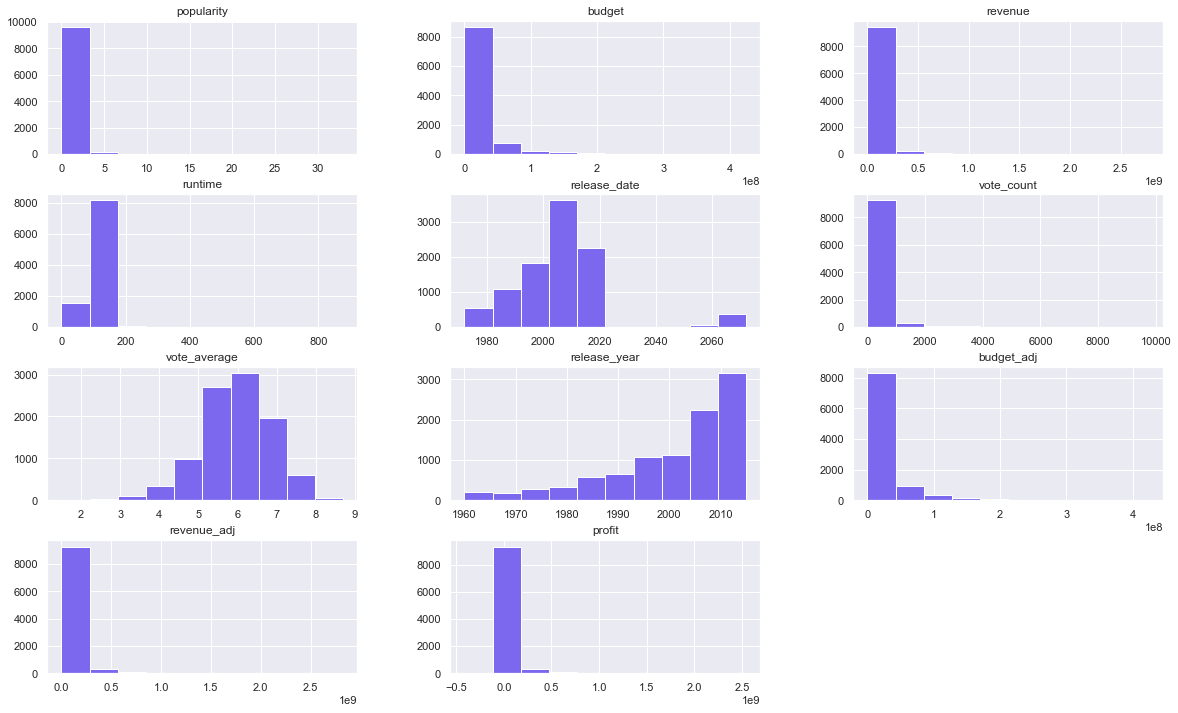

In [11]:
movie.hist(color = 'mediumslateblue',figsize = (20,12))

# Highest Movie Released Against Month
######   Number of movies released in a month all year round was counted so as to know which month has the highest number of movies 

<AxesSubplot:title={'center':'Highest Movie Released by Month'}>

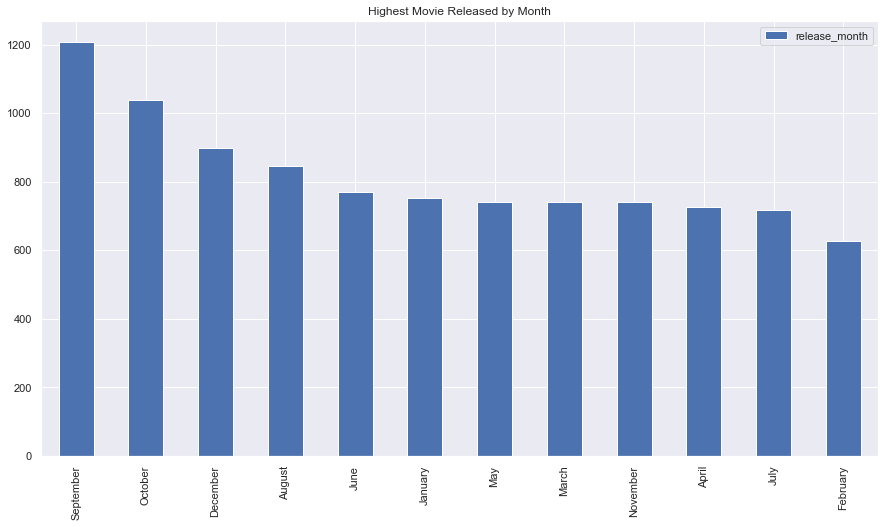

In [12]:
# Highest Movie Released against month
movie['release_month'].value_counts().to_frame().plot(kind = 'bar', title ="Highest Movie Released by Month",figsize =(15,8))


# Which Year has the Highest Movie Released?
######   Number of movies released all year round was counted so as to know which year has the highest number of movies 

<AxesSubplot:title={'center':'Highest Movie Released Per Year'}>

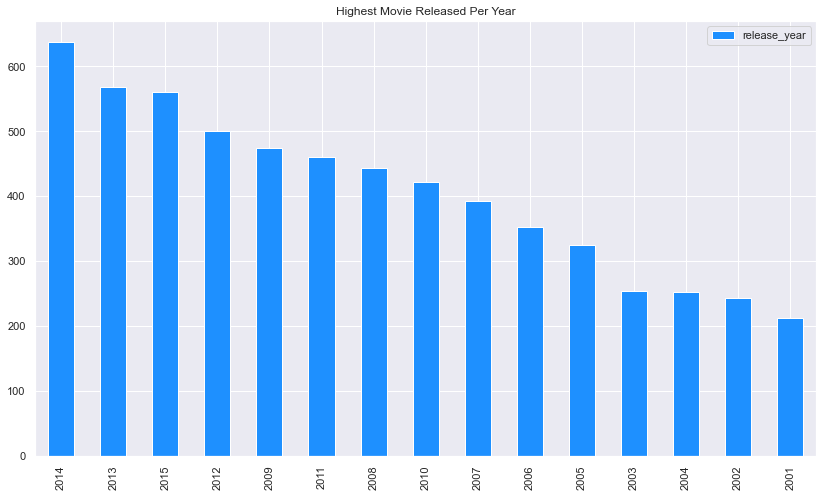

In [13]:
# Highest Movie Released per Year
movie['release_year'].value_counts().to_frame()[:15].plot(kind = 'bar', 
                                                          title = "Highest Movie Released Per Year",
                                                          color= 'dodgerblue',figsize =(14,8))



#                            Which Movie Production Companies are among Top 5 ?   

#### Counting the Top 5 prodcution companies based on the number of movies they have produced 

In [14]:
#Top 5 Production Companies
Top_Prod_Companies = movie['production_companies'].value_counts().to_frame()[:5]

trace = go.Bar(
                    x = Top_Prod_Companies.index,
                    y = Top_Prod_Companies['production_companies'],
                    orientation='v',
                    marker = dict(color='green',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Top 5 Movies Production Company',width=800, height=500, 
                       xaxis= dict(title='Production Company'),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


#                                       Which Months has Highest Movie Budget?

#### Visualizing the Top 5 months based on the movies budget this is done to know which month of the year has  highest movie budget

In [15]:
#Months with highest movie budget
Movie_budget = movie.groupby('release_month', as_index= False)['budget'].sum()[:5] 
trace = go.Bar(
                    x = Movie_budget['release_month'],
                    y = Movie_budget['budget'],
                    orientation='v',
                    marker = dict(color='steelblue',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Top Months With Highest Movie Budget',width=800, height=500, 
                       xaxis= dict(title='Month'),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

#                                        Which Year has the Highest Movie Budget?

#### Visualizing the Top 5 year based on the movies budget this is done to know which of the year has highest movie budget

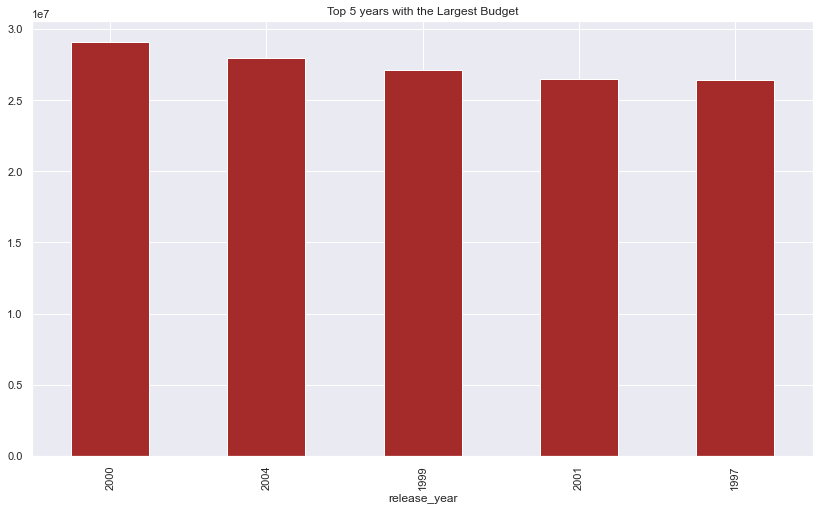

In [16]:
#Year with highest movie budget
yearly_budget = movie.groupby('release_year')['budget'].mean().nlargest(5).plot(kind = 'bar', color = 'brown',title = 'Top 5 years with the Largest Budget', 
                                                                              figsize = (14,8))


#                                        Who are Top Movie Directors ?

#### In order to know the top movie directors, the number of movies they have directed was counted and plotted against their names. According to the visuals Woody Allen has the highest number of movies directed

<AxesSubplot:title={'center':'Top 5 Movie Directors'}>

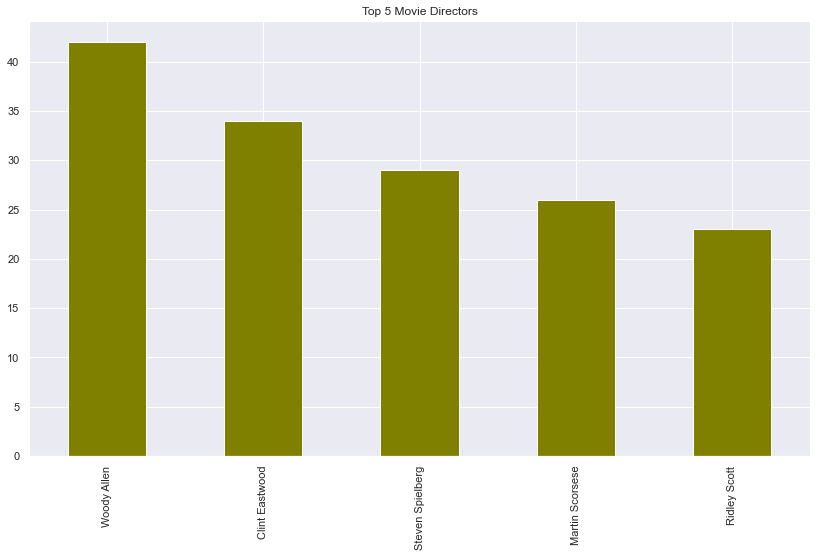

In [17]:
#Top Movie Directors 
movie['director'].value_counts()[:5].plot( kind = 'bar',title = 'Top 5 Movie Directors',color = 'olive',
                                           orientation = 'vertical',
                                           label = 'director',figsize = (14,8))

#                       Which year is the Highest Movie Production in the 90s?

#### In order to gain more insight from the data the year columns was splitted into two centuries. The number of movies produced in a year by century was counted and plotted against the year.The visuals below depicts that 1999 has the highest movie produced 

In [18]:
# Filtering to get 90's movie budgets
movie_year = movie.loc[(movie['release_year'] <= 1999) & (movie['release_year'] >= 1990)]


<AxesSubplot:title={'center':'Movies Produced In The 90S'}>

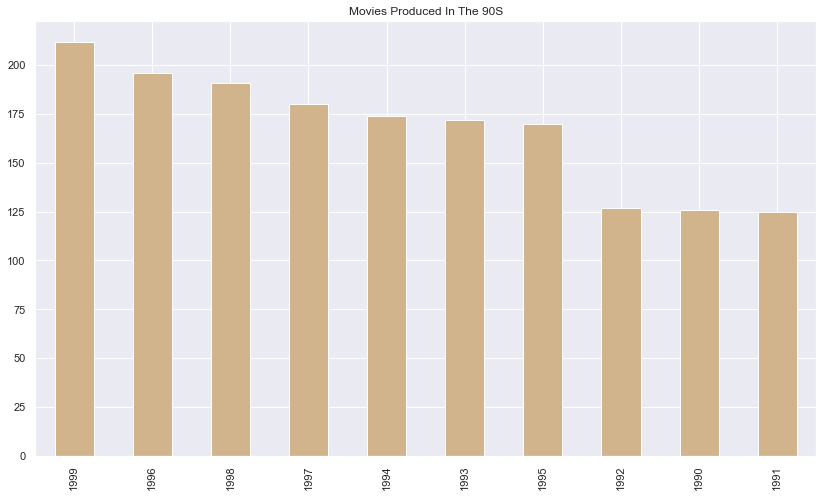

In [19]:
#Highest Movie Produced in the 90s
movie_year['release_year'].value_counts().plot( kind = 'bar',title = 'Movies Produced In The 90S',color = 'tan',
                                           orientation = 'vertical',
                                           label = 'Year',figsize = (14,8))

#                                        Which year in the 90s has the Largest budget?

####  In order to have the year with the largest budget the column year in the 90s data was plotted against the budget. From the visuals the the year 1999 has the largest budgets. 

In [20]:
# Top 5 90's Movie Budgets
old_year_budget = movie_year.groupby('release_year', as_index= False)['budget'].sum()
top_5 = old_year_budget.nlargest(5,'release_year')

trace = go.Bar(
                    x = top_5['release_year'],
                    y = top_5['budget'],
                    orientation='v',
                    marker = dict(color='blue',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Top 5 90s Movie Budgetwith year',width=800, height=500, 
                       xaxis= dict(title='Year'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


#                                        Which year in the 20s has the Largest budget?

####  In order to have the year with the largest budget the column release_year in the 20s data was plotted against the budget. From the visuals the the year 2013 has the largest budgets. 

 

In [21]:
# Filtering to get 20's movie budgets
new_century = movie.loc[(movie['release_year'] <= 2015) & (movie['release_year'] >= 2000)]


In [22]:

# 20's Movie Budgets
new_century_budget = new_century.groupby('release_year', as_index= False)['budget'].sum()
top_new_century = new_century_budget.nlargest(5,'release_year')
 

trace = go.Bar(
                    x = top_new_century['release_year'],
                    y = top_new_century['budget'],
                    orientation='v',
                    marker = dict(color='green',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Top 5 20s Movie Budget with year',width=800, height=500, 
                       xaxis= dict(title='Year'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)


#                                        Which Century has the Highest budget?

####  This is done by comparing both centuries budget data( adding each century whole budget) and comparing them. However, the 20s century has the the highest budgets which could be as a results of technology advancement.

 

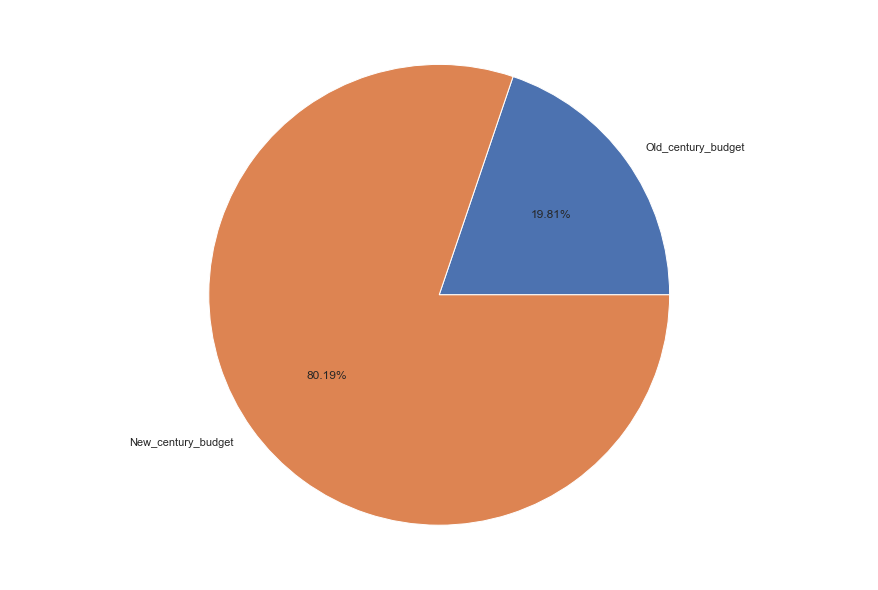

In [23]:
#Comparing Total Budgets by Century (90s vs 20s)
old_century = old_year_budget['budget'].sum()
Total_new_budget = new_century_budget['budget'].sum()

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
langs = ['Old_century_budget','New_century_budget']
Budget_sum = [29672194406, 120147882826]
ax.pie(Budget_sum, labels = langs,autopct='%1.2f%%')
plt.show()

#                                        Which Century has the Largest Profit ?

####  In order to have the century with the largest profit, each century profit was added seperately and then plotted against each other. The 20s century has the largest profit from the datset. 

 

In [24]:
#Getting Total Profit the 90s century
old_century_profit = movie_year.groupby('release_year', as_index= False)['profit'].sum()
Old_Total_Profit = old_century_profit['profit'].sum()

In [25]:
#Getting Total Profit for the 20s century
new_century_profit = new_century.groupby('release_year', as_index= False)['profit'].sum()
New_Total_Profit=new_century_profit['profit'].sum()

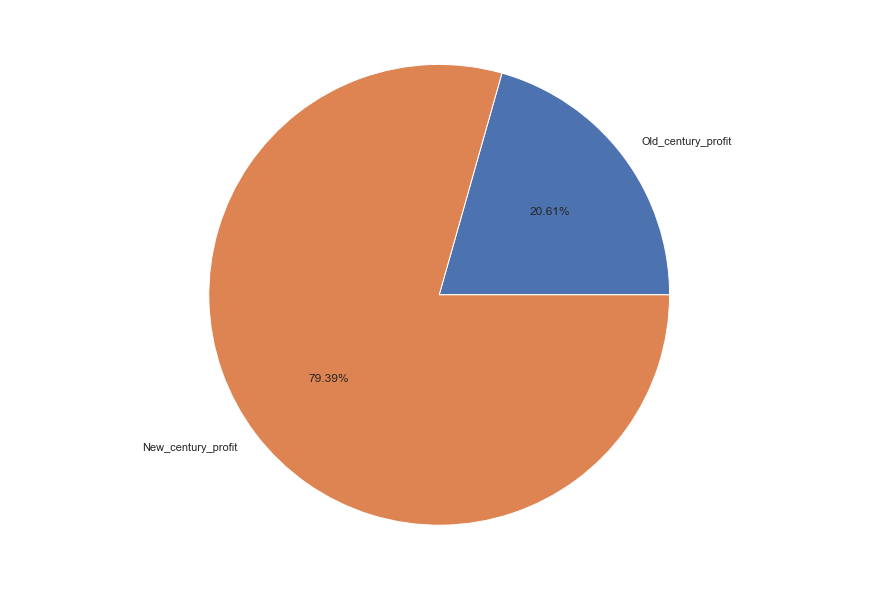

In [26]:
#Comparing Century's profit
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
langs = ['Old_century_profit','New_century_profit']
Budget_sum = [49406113767, 190326927018]
ax.pie(Budget_sum, labels = langs,autopct='%1.2f%%')
plt.show()

# What is the correlation between the release_year and budget?
##### From the visuals, the scatter plot below skewed towards the year 20's, which can be interepreted that more budget was made for movies released in the 20's than in the 90's

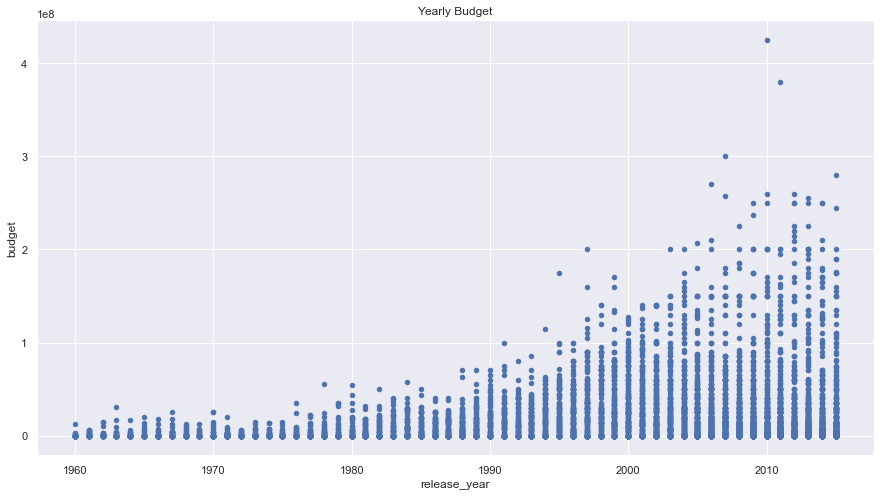

In [27]:
#scatter plot showing the correlation between release year and budget
movie.plot(kind = 'scatter', x = 'release_year', y = 'budget', title="Yearly Budget",figsize= (15,8))

plt.show()

#  Finding the Correlation between Budget and Profit





<AxesSubplot:title={'center':'Profit against Budget'}, xlabel='budget', ylabel='profit'>

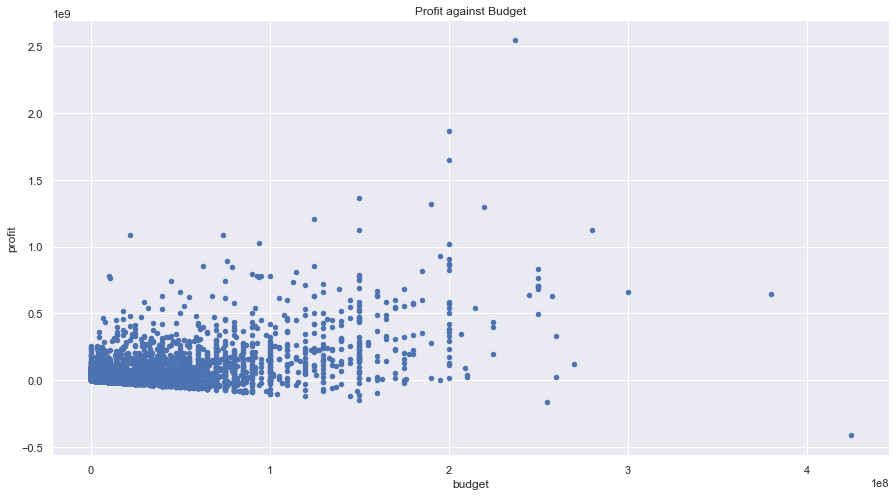

In [28]:
#Finding the Correlation between Budget and Profit
movie.plot(kind="scatter", x="budget", y="profit", title="Profit against Budget", figsize = (15,8))

#                                        Which Movie has the Largest Budgets?

####  From the original dataset, movie were groupby there title and budgets. The film with the highest  budget was "The warrior way"
 

In [29]:
# Top Movie with the highest budget

Top_movie_budget= movie.groupby('original_title', as_index= False)['budget'].max()
Highest_Budget = Top_movie_budget.nlargest(10,'budget')
trace = go.Bar(
                    y = Highest_Budget['original_title'],
                    x = Highest_Budget['budget'] ,
                    orientation='h',
                    marker = dict(color='coral',
                                 line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",title='Top Movie with the highest budget',width=800, height=500, 
                       xaxis= dict(title='Budget'),
                       yaxis=dict(autorange="reversed"),
                       showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

#                                        Which Movie has the Highest Runtime/Duration?

####  From the original dataset, movie were groupby there title and runtime. The film with the highest runtime was "Taken"
 

<AxesSubplot:title={'center':'Top 5 Movie With Highest Runtime'}, xlabel='original_title'>

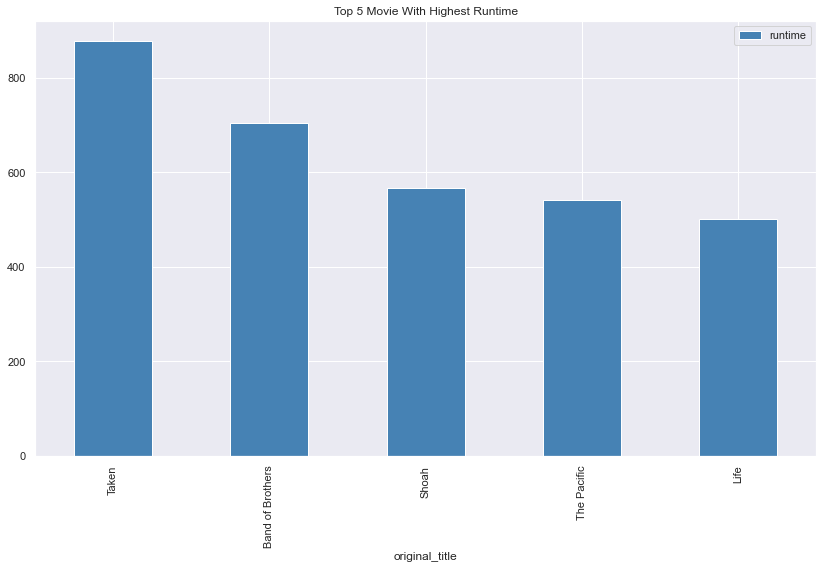

In [30]:
#movie with the highest runtime 
Time= movie.groupby('original_title', as_index= False)['runtime'].max()
Highest_time = Time.nlargest(5,'runtime')
Highest_time.set_index('original_title', inplace = True)
Highest_time.plot( kind = 'bar',title = 'Top 5 Movie With Highest Runtime',color = 'steelblue',
                                           orientation = 'vertical',label = 'Film_Title',figsize = (14,8))


#                                        Which Movie has the Highest Profit?

####  The title columns was plotted against the profit to know which movie generated the highest profit. From the data the largest profit was generated from the movie title "Avatar"
 

In [31]:
#movie with the highest profit 
highest_profit = movie.groupby('original_title', as_index= False)['profit'].max()
movie_profit = highest_profit.nlargest(10, 'profit')
movie_profit.set_index('original_title',inplace = True)

<AxesSubplot:title={'center':'Top 10 Movie With Highest Profit'}, xlabel='original_title'>

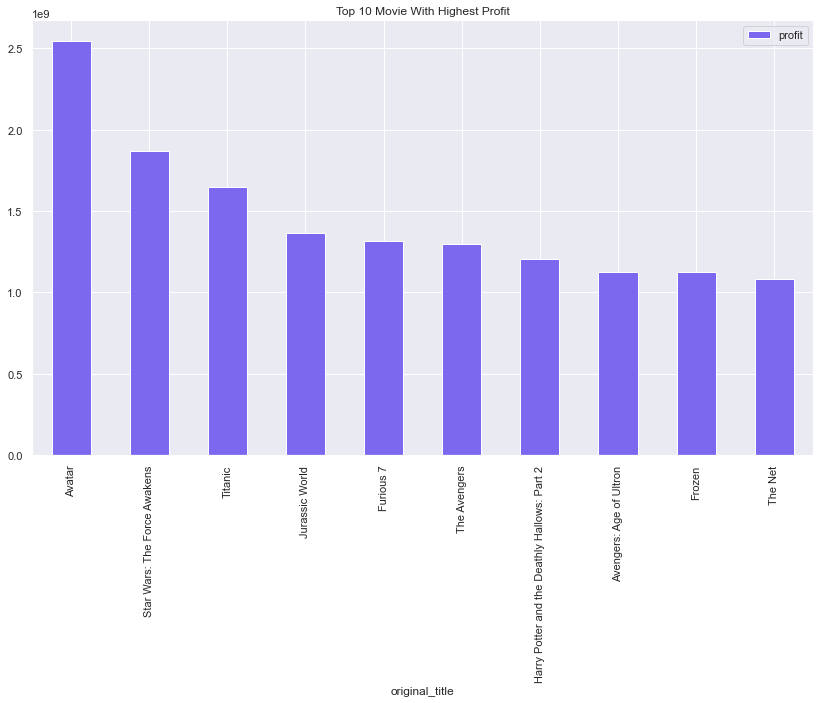

In [32]:
movie_profit.plot( kind = 'bar',title = 'Top 10 Movie With Highest Profit',color = 'mediumslateblue',
                                           orientation = 'vertical',
                                           label = 'Movie Title',figsize = (14,8))

#####                                       Making a copy of the Original Data frame and splitting the column genres using split function and explode
 

In [33]:
#Making a copy of the Original Data frame and splitting the column of genres using split function and explode
movie_new = movie.copy()
movie_new['genres'] = movie_new['genres'].str.split("|")


In [34]:
new_frame = movie_new.explode('genres')

#                                        Which Movie Genres is The Highest ?

####  The genres column from the splitted cell was counted and plotted against its number. The Drama genres was the highest of the genres

<AxesSubplot:title={'center':' Top 10 Highest Movie Genres'}>

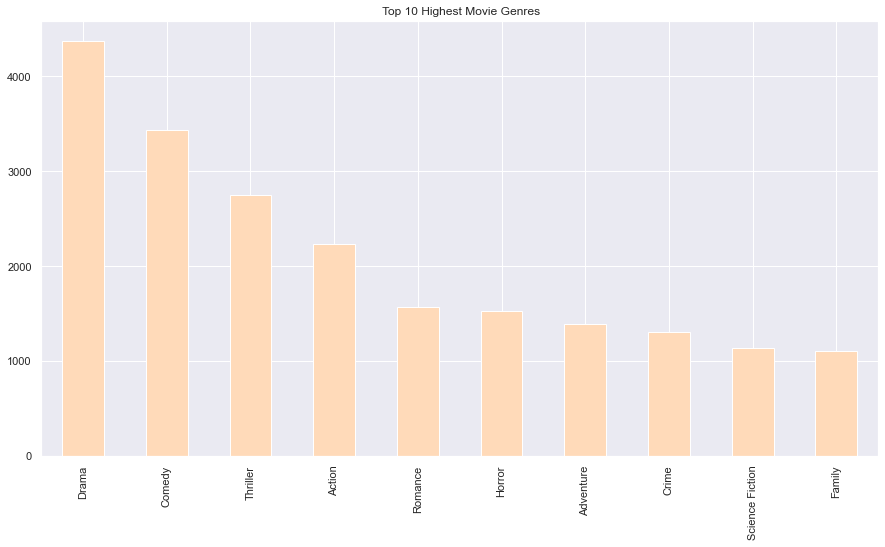

In [35]:
# TOP 10 HIGHEST MOVIE GENRES
new_frame['genres'].value_counts()[:10].plot(kind = 'bar',
                                             title =" Top 10 Highest Movie Genres",figsize =(15,8), color = 'peachpuff')

#                                        Which Movie Genres has the Highest Profit?

####  The genres column from the splitted cell was plotted against profit column to know which genres is more profitable. "From the visuals the following genres has the same set of profits "Action, Adventure, Fantasy, and Sci-Fic"


<AxesSubplot:title={'center':'Top 10 Movie Genres With Highest Profit'}, xlabel='genres'>

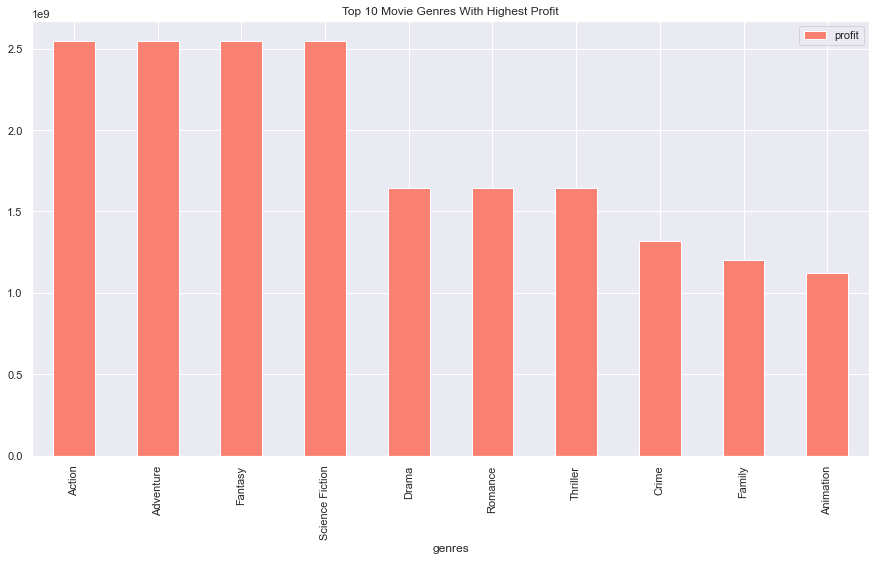

In [36]:
#TOP 10 MOVIES GENRES WITH THE HIGHEST PROFIT
Profit_genres = new_frame.groupby('genres', as_index = False)['profit'].max()
top_genres_profit = Profit_genres.nlargest(10, 'profit')
top_genres_profit.set_index('genres', inplace = True)
top_genres_profit.plot(kind= 'bar',figsize = (15,8), color = 'salmon',title = 'Top 10 Movie Genres With Highest Profit' )



 #                                               CONCLUSIONS
                                           
### After cleaning and analyzing the dataset, it can be depicted that movie genres(drama) have the highest number of movies in the dataset followed by comedy and thriller. The genres that have the highest profit generated are action, adventure, fantasy, and science-fic which could be a result of viewers’ interest. exploring the data more it could be deducted that the movie Avatar has the highest profit generated when compared to other movies. Movies with the highest budget are "The warriors and Pirate of the Caribbean" this could be a result of the manpower required to shoot the movies as well as the technology needed to simulate the ocean and ship in the pirate of the Caribbean.
### During the analysis, comparisons were made based on the century. Dataset was split into two-century 90s and 20s, the 20s has a lot of profit generated which is approximately 58.78% in contrast to the 90s. Also, the 20s has a lot of budgets which is about 60.30% in contrast to the 90s. This could be a result of technological advancement in the 20s century movies as well as technological advancement in the equipment used in the 20s century era which makes movie budgets in the 20s century to be higher than that of the 90s century. In conclusion, more movies based on the following genres (action, adventure, fantasy, and science-fic) should be invested into due to the profit generated from them.

# LIMITATION
### Reagrading the dataset, it could be found that most columns in the budget and revenue were having no values (0) even after wrangling, this might be an hinderance in having an exact and accurate values during the analysis. Also, some Null columns was dropped as well which reduced the dataset columns.